In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

## Data Wrangling

In [27]:
stocks = pd.read_csv('data.csv', index_col=0)

In [28]:
del stocks['date']
stocks.head()

,high,low,open,close,volume,adj_close,sp_percent_change,percent_change,SMA_41_period_SMA,SMM_9_period_SMM,...,PPO_HISTO,VW_MACD_MACD,VW_MACD_SIGNAL,EV_MACD_MACD,EV_MACD_SIGNAL,MOM_MOM,ROC_ROC,RSI_RSI,IFT_RSI_IFT_RSI,short_result
0,3.937500,3.781250,3.812500,3.925781,53843200.0,2.518801,0.003021,0.019270,3.888529,3.925781,...,0.326573,0.027446,0.019021,0.084081,0.085987,0.160156,5.345912,52.326346,0.128566,0
1,3.945312,3.875000,3.937500,3.875977,36739200.0,2.486846,0.001338,-0.012686,3.889315,3.925781,...,0.165085,0.023622,0.019941,0.082570,0.085304,0.063477,2.293814,46.603432,0.042299,6
2,3.890625,3.812500,3.851562,3.859375,52459200.0,2.476195,0.002674,-0.004283,3.888553,3.925781,...,0.025102,0.017531,0.019459,0.079963,0.084236,0.023438,2.489627,44.722182,0.004378,6
3,3.812500,3.734375,3.804688,3.742188,80836800.0,2.401006,0.001000,-0.030365,3.883217,3.925781,...,-0.259541,-0.001684,0.015230,0.071205,0.081629,-0.085938,-1.844262,33.656509,2.017359,9
4,3.765625,3.734375,3.757812,3.742188,58376000.0,2.401006,0.003996,0.000000,3.876739,3.875977,...,-0.427895,-0.011353,0.009914,0.065696,0.078443,-0.179688,-2.443992,33.656509,678.794701,10


In [29]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261856 entries, 0 to 261855
Data columns (total 40 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   high                    261856 non-null  float64
 1   low                     261856 non-null  float64
 2   open                    261856 non-null  float64
 3   close                   261856 non-null  float64
 4   volume                  261856 non-null  float64
 5   adj_close               261856 non-null  float64
 6   sp_percent_change       261856 non-null  float64
 7   percent_change          261856 non-null  float64
 8   SMA_41_period_SMA       261856 non-null  float64
 9   SMM_9_period_SMM        261856 non-null  float64
 10  SSMA_9_period_SSMA      261856 non-null  float64
 11  EMA_9_period_EMA        261856 non-null  float64
 12  DEMA_9_period_DEMA      261856 non-null  float64
 13  TEMA_9_period_TEMA      261856 non-null  float64
 14  TRIMA_18_period_TRIM

In [30]:
stocks.isnull().sum()

high                      0
low                       0
open                      0
close                     0
volume                    0
adj_close                 0
sp_percent_change         0
percent_change            0
SMA_41_period_SMA         0
SMM_9_period_SMM          0
SSMA_9_period_SSMA        0
EMA_9_period_EMA          0
DEMA_9_period_DEMA        0
TEMA_9_period_TEMA        0
TRIMA_18_period_TRIMA     0
TRIX_20_period_TRIX       0
VAMA_8_period_VAMA        0
ER_10_period_ER           0
KAMA_20_period_KAMA.      0
ZLEMA_26_period_ZLEMA     0
WMA_9_period_WMA.         0
deltawma                  0
HMA_16_period_HMA.        0
EVWMA_20_period_EVWMA.    0
VWAP_VWAP.                0
SMMA_SMMA                 0
MACD_MACD                 0
MACD_SIGNAL               0
PPO_PPO                   0
PPO_SIGNAL                0
PPO_HISTO                 0
VW_MACD_MACD              0
VW_MACD_SIGNAL            0
EV_MACD_MACD              0
EV_MACD_SIGNAL            0
MOM_MOM             

### Prepping data

In [31]:
bins=[-300, -11, -5, 5, 11, 300]
group_names = ['strong sell', 'sell', 'hold', 'buy', 'strong buy']
stocks['short_result'] = pd.cut(stocks['short_result'], bins=bins, labels=group_names)
stocks['short_result'].unique()

[hold, buy, strong buy, sell, strong sell]
Categories (5, object): [strong sell < sell < hold < buy < strong buy]

In [32]:
label_result = LabelEncoder()

In [33]:
stocks['short_result'] = label_result.fit_transform(stocks['short_result'])

In [34]:
stocks.head()

,high,low,open,close,volume,adj_close,sp_percent_change,percent_change,SMA_41_period_SMA,SMM_9_period_SMM,...,PPO_HISTO,VW_MACD_MACD,VW_MACD_SIGNAL,EV_MACD_MACD,EV_MACD_SIGNAL,MOM_MOM,ROC_ROC,RSI_RSI,IFT_RSI_IFT_RSI,short_result
0,3.937500,3.781250,3.812500,3.925781,53843200.0,2.518801,0.003021,0.019270,3.888529,3.925781,...,0.326573,0.027446,0.019021,0.084081,0.085987,0.160156,5.345912,52.326346,0.128566,1
1,3.945312,3.875000,3.937500,3.875977,36739200.0,2.486846,0.001338,-0.012686,3.889315,3.925781,...,0.165085,0.023622,0.019941,0.082570,0.085304,0.063477,2.293814,46.603432,0.042299,0
2,3.890625,3.812500,3.851562,3.859375,52459200.0,2.476195,0.002674,-0.004283,3.888553,3.925781,...,0.025102,0.017531,0.019459,0.079963,0.084236,0.023438,2.489627,44.722182,0.004378,0
3,3.812500,3.734375,3.804688,3.742188,80836800.0,2.401006,0.001000,-0.030365,3.883217,3.925781,...,-0.259541,-0.001684,0.015230,0.071205,0.081629,-0.085938,-1.844262,33.656509,2.017359,0
4,3.765625,3.734375,3.757812,3.742188,58376000.0,2.401006,0.003996,0.000000,3.876739,3.875977,...,-0.427895,-0.011353,0.009914,0.065696,0.078443,-0.179688,-2.443992,33.656509,678.794701,0


In [35]:
stocks['short_result'].value_counts()

1    142579
0     42264
2     38083
3     21801
4     17129
Name: short_result, dtype: int64

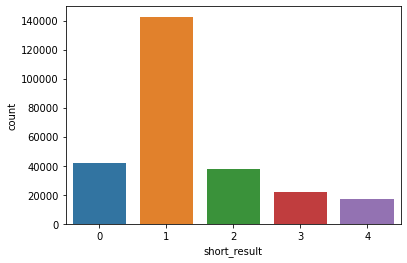

In [36]:
sns.countplot(stocks['short_result'])

In [37]:
X = stocks.drop('short_result', axis=1)
y = stocks['short_result']

### Training

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Random Forest Classifer

In [ ]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [ ]:
# See how our model performed
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

# SVM Classifier

In [ ]:
clf=svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [ ]:
# See how our model performed
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

# Neural Network

In [ ]:
mlpc = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=200)
mlpc.fit(X_train, y_train)
mlpc_clf = mlpc.predict(X_test)

In [ ]:
# See how our model performed
print(classification_report(y_test, mlpc_clf))
print(confusion_matrix(y_test, mlpc_clf))